# Exercises week 35 - Deriving and Implementing Ordinary Least Squares

### Ingvild Olden Bjerkelund

## How to take derivatives of Matrix-Vector expressions

In these exercises it is always useful to write out with summation indices the various quantities. Take also a look at the weekly slides from week 35 and the various examples included there.

As an example, consider the function

$$
f(\boldsymbol{x}) =\boldsymbol{A}\boldsymbol{x},
$$

which reads for a specific component $f_i$ (we define the matrix $\boldsymbol{A}$ to have dimension $n\times n$ and the vector $\boldsymbol{x}$ to have length $n$)

$$
f_i =\sum_{j=0}^{n-1}a_{ij}x_j,
$$

which leads to

$$
\frac{\partial f_i}{\partial x_j}= a_{ij},
$$

and written out in terms of the vector $\boldsymbol{x}$ we have

$$
\frac{\partial f(\boldsymbol{x})}{\partial \boldsymbol{x}}= \boldsymbol{A}.
$$

## Exercise 1 - Finding the derivative of Matrix-Vector expressions

**a)** Consider the expression

$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{x})}{\partial \boldsymbol{x}},
$$

Where $\boldsymbol{a}$ and $\boldsymbol{x}$ are column-vectors with length $n$.

What is the *shape* of the expression we are taking the derivative of?

What is the *shape* of the thing we are taking the derivative with respect to?

What is the *shape* of the result of the expression?

*ANSWER:*

The expression $a^T x$ calculates the dot product of the vectors $a$ and $x$: Scalar (1x1).

We are taking the derivative with respect to the vector $x$: Vector (n, 1).

When taking the derivative of a scalar (the result of $a^T x$) with respect to a vector (in this case, $x$), the result is a vector that has the same number of components as the vector with respect to which we are differentiating. The derivative $\frac{\partial (a^T x)}{\partial x}$ will yield a vector:  Vector (n, 1).

**Summary:**

- Shape of the expression: Scalar (1x1)
- Shape of the derivative variable: Vector (n, 1)
- Shape of the result of the derivative: Vector (n, 1)

**b)** Show that

$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{x})}{\partial \boldsymbol{x}} = \boldsymbol{a}^T,
$$

*ANSWER:*

The expression $a^T x$ represents a scalar (inner product): 
$$
a^T x = \sum_{i=1}^n a_i x_i
$$ 
where $a_i$ and $x_i$ are the components of the vectors $a$ and $x$, respectively.

We are interested in finding the derivative of $a^T x$ with respect to the vector $x$, which can be obtained by differentiating each component of the scalar function with respect to the corresponding component of $x$.

The $j^{th}$ component of the scalar $a^T x$ is given by:
$$
f(x) = a^T x = a_1 x_1 + a_2 x_2 + \ldots + a_n x_n
$$
We take the partial derivative of $f$ with respect to $x_j$:
$$
\frac{\partial (a^T x)}{\partial x_j} = \frac{\partial}{\partial x_j} \left( a_1 x_1 + a_2 x_2 + \ldots + a_n x_n \right)
$$
When we differentiate, we observe that the only term that depends on $x_j$ is $a_j x_j$, so:
$$
\frac{\partial (a^T x)}{\partial x_j} = a_j
$$

This differentiation holds for each component $j$ of the vector $x$. And, we can write the result in vector form:
$$
\frac{\partial (a^T x)}{\partial x} = \begin{bmatrix}
\frac{\partial (a^T x)}{\partial x_1} \\
\frac{\partial (a^T x)}{\partial x_2} \\
\vdots \\
\frac{\partial (a^T x)}{\partial x_n}
\end{bmatrix} = \begin{bmatrix}
a_1 \\
a_2 \\
\vdots \\
a_n
\end{bmatrix}
= a
$$

The result $\frac{\partial (a^T x)}{\partial x}$ is a vector $a$, but row vectors are generally denoted in terms of transpose, the final expression can be represented as:
$$
\frac{\partial (a^T x)}{\partial x} = a^T
$$


**c)** Show that

$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{A}\boldsymbol{a})}{\partial \boldsymbol{a}} = \boldsymbol{a}^T(\boldsymbol{A}+\boldsymbol{A}^T),
$$

*ANSWER:*

First rewrite the expression:
$$
f(\boldsymbol{a}) = \boldsymbol{a}^T \boldsymbol{A} \boldsymbol{a}.
$$

Using the product rule to differentiate $f(\boldsymbol{a})$ with respect to $\boldsymbol{a}$. Considering $\boldsymbol{a}^T \boldsymbol{A} \boldsymbol{a}$ as a product of two functions: $\boldsymbol{a}^T$ and $\boldsymbol{A} \boldsymbol{a}$.
$$
\frac{\partial f}{\partial \boldsymbol{a}} = \frac{\partial (\boldsymbol{a}^T)}{\partial \boldsymbol{a}} \boldsymbol{A} \boldsymbol{a} + \boldsymbol{a}^T \frac{\partial (\boldsymbol{A} \boldsymbol{a})}{\partial \boldsymbol{a}}
$$

The derivatives:
$$
\frac{\partial (\boldsymbol{a}^T)}{\partial \boldsymbol{a}} = \boldsymbol{I}
$$
$$
\frac{\partial (\boldsymbol{A} \boldsymbol{a})}{\partial \boldsymbol{a}} = \boldsymbol{A}
$$

This becomes (by using $( (\mathbf{a}^T \mathbf{A}^T)^T = \mathbf{A} \mathbf{a} )$ and $(\boldsymbol{a}^T \boldsymbol{A} = (\boldsymbol{A}^T \boldsymbol{a})^T$):
$$
\frac{\partial f}{\partial \boldsymbol{a}} = \boldsymbol{A} \boldsymbol{a} + \boldsymbol{a}^T \boldsymbol{A} = (\mathbf{a}^T \mathbf{A}^T)^T + (\boldsymbol{A}^T \boldsymbol{a})^T
$$

**This is how far I got!**

## Exercise 2 - Deriving the expression for OLS

The ordinary least squares method finds the parameters $\boldsymbol{\theta}$ which minimizes the squared error between our model $\boldsymbol{X\theta}$ and the true values $\boldsymbol{y}$.

To find the parameters $\boldsymbol{\theta}$ which minimizes this error, we take the derivative of the squared error expression with respect to $\boldsymbol{\theta}$, and set it equal to 0.

**a)** Very briefly explain why the approach above finds the parameters $\boldsymbol{\theta}$ which minimizes this error.

*ANSWER:*

We find the extrema, and since it is a convex function it is a local minimum. This then finds the parameters for the minimum squared error, and therefore when the model output are most similar to the truth values. 

We typically write the squared error as

$$
\vert\vert\boldsymbol{y} - \boldsymbol{X\theta}\vert\vert^2
$$

which we can rewrite in matrix-vector form as

$$
\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\right)
$$

**b)** If $\boldsymbol{X}$ is invertible, what is the expression for the optimal parameters $\boldsymbol{\theta}$? (**Hint:** Don't compute any derivatives, but solve $\boldsymbol{X\theta}=\boldsymbol{y}$ for $\boldsymbol{\theta}$)

*ANSWER:*

If $X$ is invertible (i.e. $XX^{-1}=I$), we can solve for $\theta$ directly (by first multiplying each side with $x^{-1}$, then reducing the right side to $\theta I = \theta 1$):

$$
\hat{\theta} = X^{-1}y
$$


**c)** Show that

$$
\frac{\partial \left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)}{\partial \boldsymbol{s}} = -2\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\boldsymbol{A},
$$

*ANSWER:*

Let $z=x-As$. Then the equation becomes:
$$
\frac{\partial \left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)}{\partial \boldsymbol{s}} = \frac{\partial z^Tz}{\partial \boldsymbol{s}} 
$$

If we expand $z^Tz$ we get:
$$
z^Tz = x^Tx - x^TAs - (As)^Tx + (As)^TAs
$$
$$
  = x^Tx - x^TAs - s^TA^Tx + s^TA^TAs
$$

Using the fact that $x^TAs$ and $s^TA^Tx$ are scalars and $(x^TAs)^T= s^TA^Tx$ and thus equal, we get: 
$$
z^Tz = x^Tx - 2(s^TA^Tx) + s^TA^TAs
$$

If we now find the derivative with respect to $s$ we get: 
$$
\frac{\partial z^Tz}{\partial \boldsymbol{s}} = \frac{\partial}{\partial \boldsymbol{s}} x^Tx - \frac{\partial}{\partial \boldsymbol{s}} 2(s^TA^Tx) + \frac{\partial}{\partial \boldsymbol{s}} s^TA^TAs
$$
$$
\frac{\partial z^Tz}{\partial \boldsymbol{s}} = 0 - 2A^Tx + \frac{\partial}{\partial \boldsymbol{s}} s^TA^TAs
$$

Using the product rule on the latter:
$$
\frac{\partial}{\partial \boldsymbol{s}} s^TA^TAs = \frac{\partial}{\partial \boldsymbol{s}} (As)^TAs = A^TAs + (As)^TA
$$
Again using the fact that $(As)^TA$ and $((As)^TA)^T = A^TAs$ are both scalars, we get: 
$$
\frac{\partial}{\partial \boldsymbol{s}} s^TA^TAs = 2A^TAs
$$

Combining this, we get: 
$$
\frac{\partial z^Tz}{\partial \boldsymbol{s}} = 2A^TAs - 2A^Tx = - 2A^T(x - As) = - 2(x - As)^TA
$$



**d)** Using the expression from **c)**, but substituting back in $\boldsymbol{\theta}$, $\boldsymbol{y}$ and $\boldsymbol{X}$, find the expression for the optimal parameters $\boldsymbol{\theta}$ in the case that $\boldsymbol{X}$ is not invertible, but $\boldsymbol{X^T X}$ is, which is most often the case.

$$
\boldsymbol{\hat{\theta}_{OLS}} = ...
$$

*ANSWER:*

If we set $x=y$, $s=\theta$ and $A=X$, and using the expression: 
$$
E(\theta) = \vert\vert\boldsymbol{y} - \boldsymbol{X\theta}\vert\vert^2 = \left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\right)
$$

We can find $\frac{\partial E(\theta)}{\partial \theta}$ by the answer from last excersise:
$$
\frac{\partial E(\theta)}{\partial \theta} = 2X^T(X\theta-y) = -2(y - X\theta)^TX
$$

By setting this to zero now we get:
$$
-2(y - X\theta)^TX = 0 \implies (y - X\theta)^TX^T=0
$$

To find $\theta$ we rearrange the expression to: 
$$
X^T y = X^T X \theta
$$

Assuming $X^TX$ is invertible, we can solve for $\theta$:
$$
\hat{\theta}_{OLS} = (X^T X)^{-1} X^T y
$$

## Exercise 3 - Creating feature matrix and implementing OLS using the analytical expression

With the expression for $\boldsymbol{\hat{\theta}_{OLS}}$, you now have what you need to implement OLS regression with your input data and target data $\boldsymbol{y}$. But before you can do that, you need to set up you input data as a feature matrix $\boldsymbol{X}$.

In a feature matrix, each row is a datapoint and each column is a feature of that data. If you want to predict someones spending based on their income and number of children, for instance, you would create a row for each person in your dataset, with the montly income and the number of children as columns.

We typically also include an intercept in our models. The intercept is a value that is added to our prediction regardless of the value of the other features. The intercept tries to account for constant effects in our data that are not dependant on anything else. In our current example, the intercept could account for living expenses which are typical regardless of income or childcare expenses.

We calculate the optimal intercept by including a feature with the constant value of 1 in our model, which is then multplied by some parameter $\theta_0$ from the OLS method into the optimal intercept value (which will be $\theta_0$). In practice, we include the intercept in our model by adding a column of ones to the start of our feature matrix.

**a)** Create a feature matrix $\boldsymbol{X}$ for the features income and children, including an intercept column of ones at the start.

**b)** Use the expression from **3d)** to find the optimal parameters $\boldsymbol{\hat{\beta}_{OLS}}$ for predicting spending based on these features. Create a function for this operation, as you are going to need to use it a lot.

In [26]:
import numpy as np

n = 20
income = np.array([116., 161., 167., 118., 172., 163., 179., 173., 162., 116., 101., 176., 178., 172., 143., 135., 160., 101., 149., 125.])
children = np.array([5, 3, 0, 4, 5, 3, 0, 4, 4, 3, 3, 5, 1, 0, 2, 3, 2, 1, 5, 4])
spending = np.array([152., 141., 102., 136., 161., 129.,  99., 159., 160., 107.,  98., 164., 121.,  93., 112., 127., 117.,  69., 156., 131.])

# a) Create a feature matrix X for the features income and children, including an intercept columns of ones at 
# the start
X1 = np.c_[np.ones(len(income)), income, children]
# Or : 
X = np.zeros((n, 3))
X[:, 0] = 1
X[:, 1] = income
X[:, 2] = children
#X, X1

# b) Use the expression from 3d) to find the optimal parameters \hat{\beta_{OLS}} for predicting spending based
#    on these features. 
#    \hat{\theta}_{OLS} = (X^T X)^{-1} X^T y
#    Create a function for this operation, as you are going to need to use it a lot.

def OLS_parameters(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

x = np.c_[np.ones(len(income)), income, children]
y = spending
beta = OLS_parameters(x, y)

print(f"OLS Parameters:")
print(beta)

OLS Parameters:
[ 9.12808583  0.5119025  14.60743095]


## Exercise 4 - Fitting a polynomial

In this course, we typically do linear regression using polynomials, though in real world applications it is also very common to make linear models based on measured features like you did in the previous exercise.

When fitting a polynomial with linear regression, we make each polynomial degree($x, x^2, x^3, ..., x^p$) its own feature.

**a)** Create a feature matrix $\boldsymbol{X}$ for the features $x, x^2, x^3, x^4, x^5$, including an intercept column of ones at the start. Make this into a function, as you will do this a lot over the next weeks.

**b)** Use the expression from **3d)** to find the optimal parameters $\boldsymbol{\hat{\beta}_{OLS}}$ for predicting $\boldsymbol{y}$ based on these features. If you have done everything right so far, this code will not need changing.

**c)** Like in exercise 4 last week, split your feature matrix and target data into a training split and test split.

**d)** Train your model on the training data(find the parameters which best fit) and compute the MSE on both the training and test data.

In [47]:
n = 100
x = np.linspace(-3, 3, n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1)

# a) Create a feature matrix X for the features x,x^2,x^3,x^4,x^5, including an intercept column of ones at the start.
#    Make this into a function, as you will do this a lot over the next weeks. 

def polynomial_features(x, p):
    #x = np.asarray(x).flatten()  # Ensure x is a 1D array
    n = len(x)  # Number of samples
    X = np.zeros((n, p + 1))  # Initialize an array with shape (n, p+1)
    for i in range(p + 1):
        X[:, i] = x ** i  # Assign the i-th column to x raised to the power of i
        #X[:, i] = x.flatten() ** i  # Flattens to ensure it's a 1D array
    return X

X = polynomial_features(x, 5)

# b) Use the expression from 3d) to find the optimal parameters \hat{\beta_{OLS}} for predicting y based
#    on these features. If you have done everything right so far, this code will not need changing. 

beta = OLS_parameters(X, y)

print(f"OLS Parameters for polynomial features:")
print(beta)

# c) Like in Excercise 4 last week, split feature matrix and target data into a training plit and test split. 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

print(f"X_train shape : {X_train.shape}, y_train shape : {y_train.shape}")
print(f"X_test shape  : {X_test.shape}, y_test shape  : {y_test.shape}")


# d) Train your model on the training data (find the parameters which best fit) and compute the MSE on both
#    the training and test data

beta = OLS_parameters(X_train, y_train)

y_train_pred = X_train @ beta
y_test_pred  = X_test @ beta

mse_train = np.mean((y_train - y_train_pred) ** 2)
mse_test  = np.mean((y_test  - y_test_pred)  ** 2)

print(f"MSE train: {mse_train}")
print(f"MSE test : {mse_test}")

OLS Parameters for polynomial features:
[ 0.84577122  0.27464654 -0.02326439  0.05342623 -0.0034652  -0.0087781 ]
X_train shape : (80, 6), y_train shape : (80,)
X_test shape  : (20, 6), y_test shape  : (20,)
MSE train: 0.01235586424275262
MSE test : 0.04286586061129313


**e)** Do the same for each polynomial degree from 2 to 10, and plot the MSE on both the training and test data as a function of polynomial degree. The aim is to reproduce Figure 2.11 of [Hastie et al](https://github.com/CompPhysics/MLErasmus/blob/master/doc/Textbooks/elementsstat.pdf). Feel free to read the discussions leading to figure 2.11 of Hastie et al. 

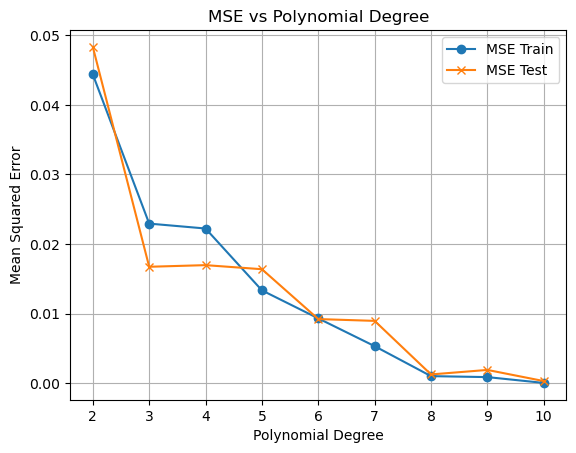

In [48]:
# e) Do the same for each polynomial degree from 2 to 10, and plot MSE on both the training and test data as 
#    a function of polynomial degree. The aim is to reproduce Figure 2.11 of Hasties et al. Feel free to read 
#    the discussion leading to figure 2.11 of Hasite et al.

import matplotlib.pyplot as plt

n = 100
x = np.linspace(-3, 3, n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1)

degrees = range(2, 11)
mse_train_list = []
mse_test_list = []

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

for p in degrees:
    #print(f"Degree: {p}")
    X_train_poly = polynomial_features(X_train, p)
    X_test_poly  = polynomial_features(X_test, p)
    beta = OLS_parameters(X_train_poly, y_train)
    y_train_pred = X_train_poly @ beta
    y_test_pred  = X_test_poly @ beta
    mse_train = np.mean((y_train - y_train_pred) ** 2)
    mse_test  = np.mean((y_test - y_test_pred) ** 2)
    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)

# Plotting the MSE
plt.plot(degrees, mse_train_list, label="MSE Train", marker='o')
plt.plot(degrees, mse_test_list,  label="MSE Test",  marker='x')
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("MSE vs Polynomial Degree")
plt.grid()
plt.show()

**f)** Interpret the graph. Why do the lines move as they do? What does it tell us about model performance and generalizability?

*ANSWER:*

The mean squared error for both test and training decreases as the polynomial degree increases, which indicates that the model is able to fit the data better with more complex models. When I tested the increase in the polynomial degree, the MSE got worse after about 12th degree, which could indicate that this is when overfitting happens. However, when comparing to the figure 2.11 in Hastie et al., in my case both the test and training seems to become worse, at the same time. Overfitting means that the models fits too well to the given train-data that it miss fitting the test-data. Low-degree polynomials may underfit the data while high-degree polynomials may overfit it, and is not able to generalize to the test-data. Figure 2.11 shows the bias-variance tradeoff and describes the balance between a model's ability to minimize bias (error due to overly simplistic assumptions) and variance (error due to excessive complexity).

## Exercise 5 - Comparing your code with sklearn

When implementing different algorithms for the first time, it can be helpful to double check your results with established implementations before you go on to add more complexity.

**a)** Make sure your `polynomial_features` function creates the same feature matrix as sklearns PolynomialFeatures.

(https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

In [49]:
# a) Make sure your polynomial_features function creates the same feature matrix as sklearns PolynomialFeatures.

from sklearn.preprocessing import PolynomialFeatures

my_feature_matrix = polynomial_features(X_train, 3)
sklearn_feature_matrix = PolynomialFeatures(degree=3, include_bias=True).fit_transform(X_train.reshape(-1, 1))

# Comparing the results:
#print("My Feature Matrix:")
#print(my_feature_matrix)
#print("Sklearn Feature Matrix:")
#print(sklearn_feature_matrix)

print("Are the matrices equal?", np.allclose(my_feature_matrix, sklearn_feature_matrix))

Are the matrices equal? True


**b)** Make sure your `OLS_parameters` function computes the same parameters as sklearns LinearRegression with fit_intercept set to False, since the intercept is included in the feature matrix. Use `your_model_object.coef_` to extract the computed parameters.

(https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [54]:
# b) Make sure your OLS_parameters function computes the same parameters as sklearns LinearRegression with 
#    fit_intercept set to False, since the intercept is included in the feature matrix. Use your_model_object.coef_
#    to extract the computed parameters. 

from sklearn.linear_model import LinearRegression

X = polynomial_features(x, 10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

my_OLS_parameters = OLS_parameters(X_train, y_train)
sklearn_model = LinearRegression(fit_intercept=False).fit(X_train, y_train)
sklearn_parameters = sklearn_model.coef_

# Comparing the results:
print("My OLS Parameters:")
print(my_OLS_parameters)
print("Sklearn Parameters:")
print(sklearn_parameters)

print("Are the parameters equal?", np.allclose(my_OLS_parameters, sklearn_parameters))

My OLS Parameters:
[ 1.01292090e+00  9.27189048e-02 -7.26029104e-01  2.39716819e-01
  4.52555927e-01 -5.66037947e-02 -1.11667556e-01  3.76161032e-03
  1.18916636e-02 -4.30383598e-05 -4.67934249e-04]
Sklearn Parameters:
[ 1.01292090e+00  9.27189035e-02 -7.26029105e-01  2.39716821e-01
  4.52555927e-01 -5.66037954e-02 -1.11667556e-01  3.76161042e-03
  1.18916636e-02 -4.30383653e-05 -4.67934248e-04]
Are the parameters equal? True
